#### Importing the Libraries

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier

#### Importing the Data

In [2]:
df = pd.read_csv(r"C:\Users\india\Downloads\emotions.csv")

In [3]:
df.head()

,text,label
0,ive enjoyed being able to slouch about relax a...,0
1,i dont know i feel so lost,0
2,i was beginning to feel quite disheartened,0
3,i can still lose the weight without feeling de...,0
4,im feeling a little like a damaged tree and th...,0


In [4]:
df['label'].unique()

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [5]:
df['label'] = df['label'].map({0:"Sad",1:"Joy",2:"Love",3:"Anger",4:"Fear",5:"Surpise"})

In [6]:
df

,text,label
0,ive enjoyed being able to slouch about relax a...,Sad
1,i dont know i feel so lost,Sad
2,i was beginning to feel quite disheartened,Sad
3,i can still lose the weight without feeling de...,Sad
4,im feeling a little like a damaged tree and th...,Sad
...,...,...
11995,i feel weird using his first name but the alte...,Surpise
11996,i read them i feel pleasantly surprised that t...,Surpise
11997,i feel a strange sense of guilt about it all,Surpise
11998,i let people know how i m actually feeling and...,Surpise


#### Exploratory Data Analysis

In [7]:
#missing Values
df.isna().sum()

text     0
label    0
dtype: int64

In [8]:
#Duplicates
df.duplicated().sum()
df.drop_duplicates(inplace = True)

<Axes: >

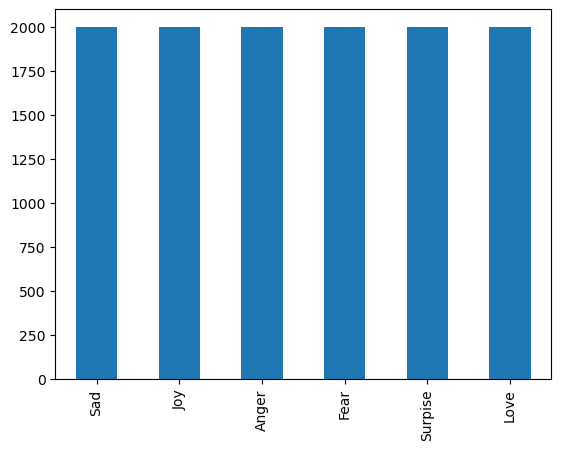

In [9]:
#Distributions
df['label'].value_counts().plot(kind = 'bar')

#### Splitting The Data

In [11]:
X = df['text']
y = df['label']

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.2,random_state= 23 )

In [13]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.pipeline import Pipeline

In [19]:
pipe = Pipeline([("Vectorozation",CountVectorizer(stop_words='english')),
         ("Estimator",MultinomialNB(alpha=6))])

In [20]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('Vectorozation', CountVectorizer(stop_words='english')),
                ('Estimator', MultinomialNB(alpha=6))])

In [21]:
pipe.predict(X_test)

array(['Sad', 'Sad', 'Fear', ..., 'Anger', 'Love', 'Sad'], dtype='<U7')

### Creating the pickle file

In [23]:
import pickle

In [24]:
pickle.dump(pipe,open("estimator.pkl",'wb'))

In [25]:
import os
os.getcwd()

'C:\\Users\\DELL\\Elite 16'

In [27]:
predict = pickle.load(open("estimator.pkl",'rb'))

In [30]:
predict.predict(["i am feeling lonely"])[0]

'Sad'